# TSNE Analysis

In [1]:
import sys
sys.path.append('C:/Users/nikol/Documents/GitHub/EnsembleTools')

In [2]:
from dpet.ensemble_analysis import EnsembleAnalysis
import os
os.environ["LOKY_MAX_CPU_COUNT"] = "8"

c:\Users\nikol\anaconda3\envs\tensorflowgpu\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Download from Atlas and Load Data

In [3]:
from dpet.ensemble import Ensemble


ensembles = [
    Ensemble("PED00156e001", data_path='C:/Users/nikol/Documents/test_dir/ped/PED00156e001.dcd', top_path='C:/Users/nikol/Documents/test_dir/ped/PED00156e001.top.pdb'),
    Ensemble("PED00157e001", data_path='C:/Users/nikol/Documents/test_dir/ped/PED00157e001.dcd', top_path='C:/Users/nikol/Documents/test_dir/ped/PED00157e001.top.pdb'),
    Ensemble("PED00158e001", data_path='C:/Users/nikol/Documents/test_dir/ped/PED00158e001.dcd', top_path='C:/Users/nikol/Documents/test_dir/ped/PED00158e001.top.pdb')
]
data_dir = 'C:/Users/nikol/Documents/test_dir/testington'

analysis = EnsembleAnalysis(ensembles, data_dir)
analysis.load_trajectories()

Loading trajectory for PED00156e001...
Loading trajectory for PED00157e001...
Loading trajectory for PED00158e001...


{'PED00156e001': <mdtraj.Trajectory with 100 frames, 941 atoms, 59 residues, without unitcells at 0x1ee08c744c0>,
 'PED00157e001': <mdtraj.Trajectory with 100 frames, 939 atoms, 59 residues, without unitcells at 0x1ee18d37ee0>,
 'PED00158e001': <mdtraj.Trajectory with 88 frames, 939 atoms, 59 residues, without unitcells at 0x1ee18d4bdc0>}

In [4]:
analysis.random_sample_trajectories(sample_size=50)

50 conformations sampled from PED00156e001 trajectory.
50 conformations sampled from PED00157e001 trajectory.
50 conformations sampled from PED00158e001 trajectory.


{'PED00156e001': <mdtraj.Trajectory with 50 frames, 941 atoms, 59 residues, without unitcells at 0x1ee08c74ee0>,
 'PED00157e001': <mdtraj.Trajectory with 50 frames, 939 atoms, 59 residues, without unitcells at 0x1ee08c74f70>,
 'PED00158e001': <mdtraj.Trajectory with 50 frames, 939 atoms, 59 residues, without unitcells at 0x1ee08c75150>}

## Featurization

In [5]:
analysis.extract_features(featurization='phi_psi')

Performing feature extraction for Ensemble: PED00156e001.
Transformed ensemble shape: (50, 116)
Performing feature extraction for Ensemble: PED00157e001.
Transformed ensemble shape: (50, 116)
Performing feature extraction for Ensemble: PED00158e001.
Transformed ensemble shape: (50, 116)
Feature names: ['GLU2-PHI', 'ALA3-PHI', 'ILE4-PHI', 'ALA5-PHI', 'LYS6-PHI', 'HIS7-PHI', 'ASP8-PHI', 'PHE9-PHI', 'SER10-PHI', 'ALA11-PHI', 'THR12-PHI', 'ALA13-PHI', 'ASP14-PHI', 'ASP15-PHI', 'GLU16-PHI', 'LEU17-PHI', 'SER18-PHI', 'PHE19-PHI', 'ARG20-PHI', 'LYS21-PHI', 'THR22-PHI', 'GLN23-PHI', 'ILE24-PHI', 'LEU25-PHI', 'LYS26-PHI', 'ILE27-PHI', 'LEU28-PHI', 'ASN29-PHI', 'MET30-PHI', 'GLU31-PHI', 'ASP32-PHI', 'ASP33-PHI', 'SER34-PHI', 'ASN35-PHI', 'TRP36-PHI', 'TYR37-PHI', 'ARG38-PHI', 'ALA39-PHI', 'GLU40-PHI', 'LEU41-PHI', 'ASP42-PHI', 'GLY43-PHI', 'LYS44-PHI', 'GLU45-PHI', 'GLY46-PHI', 'LEU47-PHI', 'ILE48-PHI', 'PRO49-PHI', 'SER50-PHI', 'ASN51-PHI', 'TYR52-PHI', 'ILE53-PHI', 'GLU54-PHI', 'MET55-PHI', 'L

{'PED00156e001': array([[-1.5575014 , -1.9715832 , -1.2689548 , ...,  1.5037582 ,
         -0.6004688 ,  2.1133227 ],
        [-1.4683609 , -1.5092826 , -1.4392669 , ...,  1.8398284 ,
          2.2516847 , -1.0201757 ],
        [-1.527737  ,  1.251689  , -1.3004837 , ...,  1.7019145 ,
          2.789283  , -1.0544657 ],
        ...,
        [ 0.98854375, -1.3484731 , -1.223957  , ..., -1.0434515 ,
          1.2374626 ,  1.9335427 ],
        [-2.0216029 , -1.8091103 , -1.5594853 , ...,  2.7713532 ,
          2.1313117 ,  2.6287034 ],
        [-2.8268054 ,  0.9485077 , -2.1144667 , ...,  1.3727243 ,
          1.0916106 ,  2.0267541 ]], dtype=float32),
 'PED00157e001': array([[-2.2594733 , -1.5816727 , -2.0149026 , ..., -0.93762666,
          1.8569064 ,  3.0622773 ],
        [-1.1393118 , -1.0456723 , -1.7348104 , ...,  2.7404232 ,
          2.0652642 ,  1.7510108 ],
        [-0.61965615, -1.9237431 , -1.5164486 , ...,  2.1447806 ,
         -0.8087041 ,  2.318034  ],
        ...,
       

## Dimensionality Reduction

In [6]:
analysis.reduce_features(method='tsne', perplexity_vals = [10, 50], circular=True, range_n_clusters=range(2,10,1))

Concatenated featurized ensemble shape: (150, 116)
tsne is running...


c:\Users\nikol\anaconda3\envs\tensorflowgpu\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\nikol\anaconda3\envs\tensorflowgpu\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\nikol\anaconda3\envs\tensorflowgpu\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\nikol\anaconda3\envs\tensorflowgpu\lib\site-packages\sklearn\cluster\_

Best Perplexity: 50
Best Number of Clusters: 2


c:\Users\nikol\anaconda3\envs\tensorflowgpu\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\nikol\anaconda3\envs\tensorflowgpu\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\nikol\anaconda3\envs\tensorflowgpu\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\nikol\anaconda3\envs\tensorflowgpu\lib\site-packages\sklearn\cluster\_

array([[ 1.09075642e+00,  9.10744786e-01],
       [-1.52921355e+00, -1.41930461e-01],
       [ 2.47939706e+00,  3.70658457e-01],
       [-1.73662376e+00,  1.98199928e+00],
       [-1.38036489e+00, -2.97931552e+00],
       [-2.38919234e+00,  8.82462442e-01],
       [-2.50788999e+00,  9.09619391e-01],
       [-1.76829958e+00,  1.57060957e+00],
       [-4.90487248e-01,  7.62534082e-01],
       [-1.73235071e+00,  1.68523932e+00],
       [ 8.09744775e-01,  1.81280732e+00],
       [ 3.30022007e-01, -3.73974586e+00],
       [-1.48347151e+00,  1.46289217e+00],
       [ 1.74463022e+00,  9.02843058e-01],
       [ 4.10193592e-01,  1.36624682e+00],
       [-9.05081451e-01,  1.01954234e+00],
       [-1.54697582e-01,  1.15923715e+00],
       [-1.24971330e+00,  2.24892521e+00],
       [-2.18104959e+00,  7.41884887e-01],
       [-1.41940880e+00,  5.10004997e-01],
       [-5.67116499e-01,  1.64183092e+00],
       [ 2.50077754e-01,  1.54278696e+00],
       [-2.79966331e+00, -7.23032802e-02],
       [-2.

## Analysis

C:\Users/nikol/Documents/GitHub/EnsembleTools\dpet\visualization.py:302: UserWarning: The following kwargs were not used by contour: 'label'
  ax[3].contour(xi, yi, zi.reshape(xi.shape), levels=5, alpha=0.5, label=f'Ensemble {label}', colors=[label_colors[label]])
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
C:\Users\nikol\AppData\Local\Temp\ipykernel_4516\3052845575.py:14: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


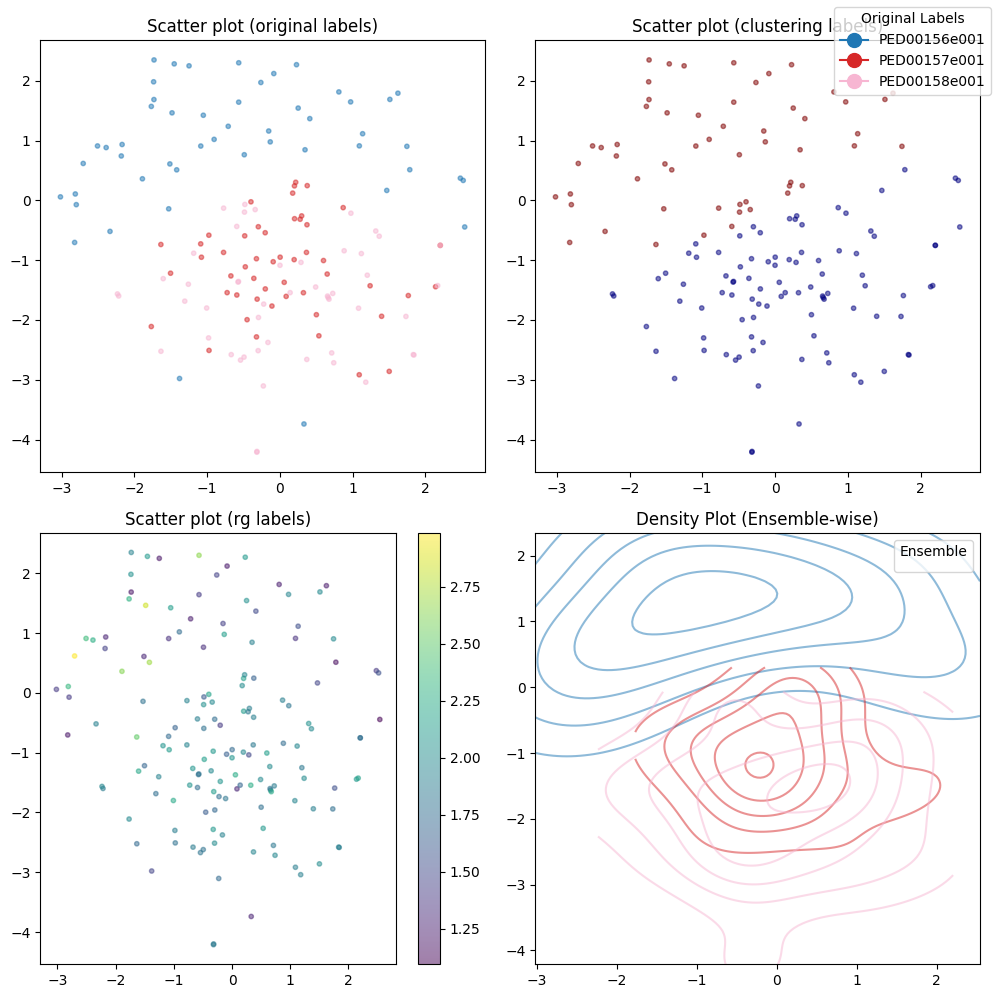

In [13]:
from matplotlib import pyplot as plt
from dpet.visualization import Visualization


vis = Visualization(analysis)

#visualization.tsne_ramachandran_density(save=True)

fig, ax = plt.subplots(2, 2, figsize=(10, 10))

vis.tsne_scatter(ax=ax, kde_by_ensemble=True)
#vis.ramachandran_plots(ax=[ax[1,0]], two_d_hist=True)

fig.show()

In [8]:
analysis.get_features('phi_psi')

{'PED00156e001': array([[-1.5575014 , -1.9715832 , -1.2689548 , ...,  1.5037582 ,
         -0.6004688 ,  2.1133227 ],
        [-1.4683609 , -1.5092826 , -1.4392669 , ...,  1.8398284 ,
          2.2516847 , -1.0201757 ],
        [-1.527737  ,  1.251689  , -1.3004837 , ...,  1.7019145 ,
          2.789283  , -1.0544657 ],
        ...,
        [ 0.98854375, -1.3484731 , -1.223957  , ..., -1.0434515 ,
          1.2374626 ,  1.9335427 ],
        [-2.0216029 , -1.8091103 , -1.5594853 , ...,  2.7713532 ,
          2.1313117 ,  2.6287034 ],
        [-2.8268054 ,  0.9485077 , -2.1144667 , ...,  1.3727243 ,
          1.0916106 ,  2.0267541 ]], dtype=float32),
 'PED00157e001': array([[-2.2594733 , -1.5816727 , -2.0149026 , ..., -0.93762666,
          1.8569064 ,  3.0622773 ],
        [-1.1393118 , -1.0456723 , -1.7348104 , ...,  2.7404232 ,
          2.0652642 ,  1.7510108 ],
        [-0.61965615, -1.9237431 , -1.5164486 , ...,  2.1447806 ,
         -0.8087041 ,  2.318034  ],
        ...,
       

C:\Users/nikol/Documents/GitHub/EnsembleTools\dpet\visualization.py:302: UserWarning: The following kwargs were not used by contour: 'label'
  ax[3].contour(xi, yi, zi.reshape(xi.shape), levels=5, alpha=0.5, label=f'Ensemble {label}', colors=[label_colors[label]])
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


array([<Axes: title={'center': 'Scatter plot (original labels)'}>,
       <Axes: title={'center': 'Scatter plot (clustering labels)'}>,
       <Axes: title={'center': 'Scatter plot (end_to_end labels)'}>,
       <Axes: title={'center': 'Density Plot (Ensemble-wise)'}>],
      dtype=object)

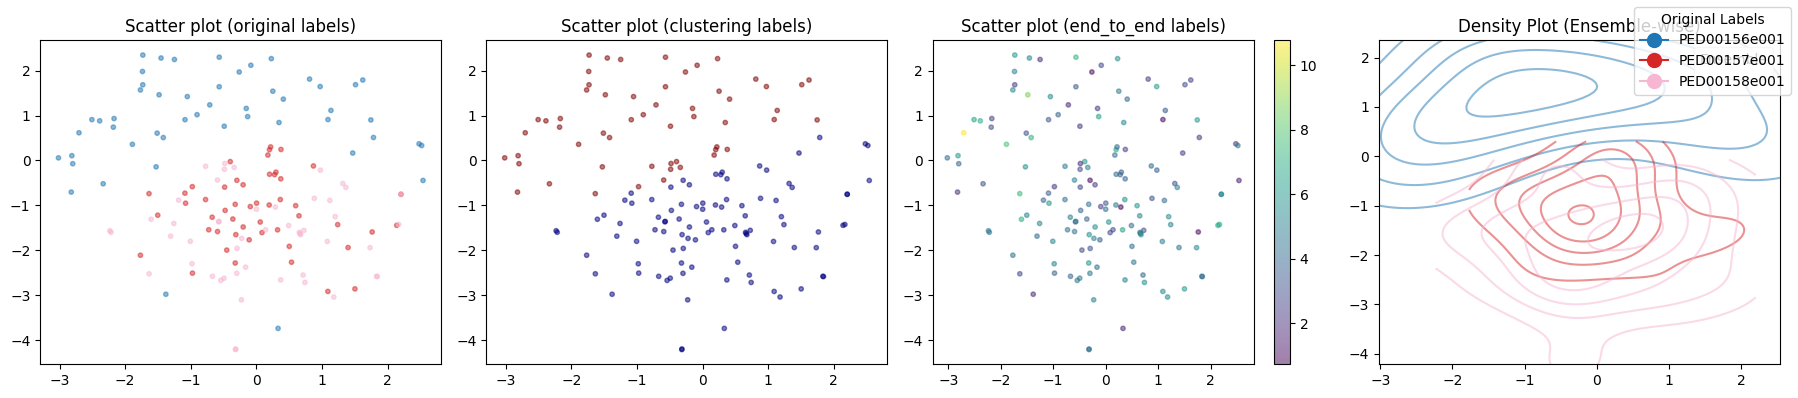

In [10]:
vis.tsne_scatter(color_by="end_to_end", save=False, kde_by_ensemble=True)

In [11]:
vis.generate_report()

Plots saved to C:\Users\nikol\Documents\test_dir\testington\plots\tsne.pdf


In [12]:
vis.generate_custom_report()

Plots saved to C:\Users\nikol\Documents\test_dir\testington\plots\custom_report.pdf
